## Goal

The objective of this dataset is to predict the medical condition (Cancer, Pneumonia, Diabetic) of a user based on their demographic, lifestyle, and health-related features. This dataset can be used to explore strategies for dealing with imbalanced classes and missing data in healthcare applications. ​

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer

In [2]:
df = pd.read_csv("/kaggle/input/medical-condition-prediction-dataset/medical_conditions_dataset.csv")

## Features

id: Unique identifier for each user.
full_name: Randomly generated user name.
age: Age of the user (ranging from 18 to 90 years), with some missing values.
gender: The gender of the user (categorized as Male, Female, or Non-Binary).
smoking_status: Indicates the smoking status of the user (Smoker, Non-Smoker, Former-Smoker).
bmi: Body Mass Index (BMI) of the user (ranging from 15 to 40), with some missing values.
blood_pressure: Blood pressure levels of the user (ranging from 90 to 180 mmHg), with some missing values.
glucose_levels: Blood glucose levels of the user (ranging from 70 to 200 mg/dL), with some missing values.
condition: The target label indicating the medical condition of the user (Cancer, Pneumonia, or Diabetic), with imbalanced distribution (15% Cancer, 25% Pneumonia, 60% Diabetic).

In [3]:
df.head()

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic


In [4]:
print(f"The size of the df: {df.shape}")

The size of the df: (10000, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   full_name       10000 non-null  object 
 2   age             5445 non-null   float64
 3   gender          10000 non-null  object 
 4   smoking_status  10000 non-null  object 
 5   bmi             4652 non-null   float64
 6   blood_pressure  3766 non-null   float64
 7   glucose_levels  4756 non-null   float64
 8   condition       10000 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 703.2+ KB


In [6]:
df['gender'].value_counts(normalize=True)

gender
male      0.8506
female    0.1494
Name: proportion, dtype: float64

In [7]:
df['smoking_status'].value_counts(normalize=True)

smoking_status
Non-Smoker    0.9014
Smoker        0.0986
Name: proportion, dtype: float64

In [8]:
df['condition'].value_counts(normalize=True)

condition
Diabetic     0.6013
Pneumonia    0.2527
Cancer       0.1460
Name: proportion, dtype: float64

In [9]:
df[['gender', 'smoking_status', 'condition']].value_counts().reset_index()

,gender,smoking_status,condition,count
0,male,Non-Smoker,Diabetic,4596
1,male,Non-Smoker,Pneumonia,1924
2,male,Non-Smoker,Cancer,1128
3,female,Non-Smoker,Diabetic,814
4,male,Smoker,Diabetic,524
5,female,Non-Smoker,Pneumonia,357
6,male,Smoker,Pneumonia,212
7,female,Non-Smoker,Cancer,195
8,male,Smoker,Cancer,122
9,female,Smoker,Diabetic,79


In [10]:
df.groupby('gender')[['smoking_status', 'condition']].value_counts().reset_index()

,gender,smoking_status,condition,count
0,female,Non-Smoker,Diabetic,814
1,female,Non-Smoker,Pneumonia,357
2,female,Non-Smoker,Cancer,195
3,female,Smoker,Diabetic,79
4,female,Smoker,Pneumonia,34
5,female,Smoker,Cancer,15
6,male,Non-Smoker,Diabetic,4596
7,male,Non-Smoker,Pneumonia,1924
8,male,Non-Smoker,Cancer,1128
9,male,Smoker,Diabetic,524


In [11]:
df.groupby("gender")[["condition"]].value_counts().reset_index()

,gender,condition,count
0,female,Diabetic,893
1,female,Pneumonia,391
2,female,Cancer,210
3,male,Diabetic,5120
4,male,Pneumonia,2136
5,male,Cancer,1250


In [12]:
df.groupby("smoking_status")[['condition']].value_counts().reset_index()

,smoking_status,condition,count
0,Non-Smoker,Diabetic,5410
1,Non-Smoker,Pneumonia,2281
2,Non-Smoker,Cancer,1323
3,Smoker,Diabetic,603
4,Smoker,Pneumonia,246
5,Smoker,Cancer,137


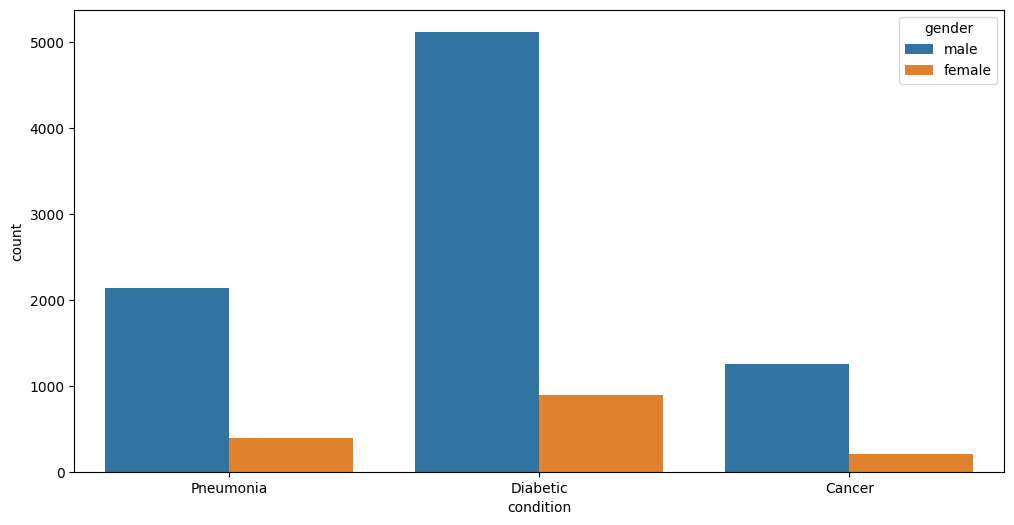

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x ="condition", data=df, hue="gender")
plt.show()

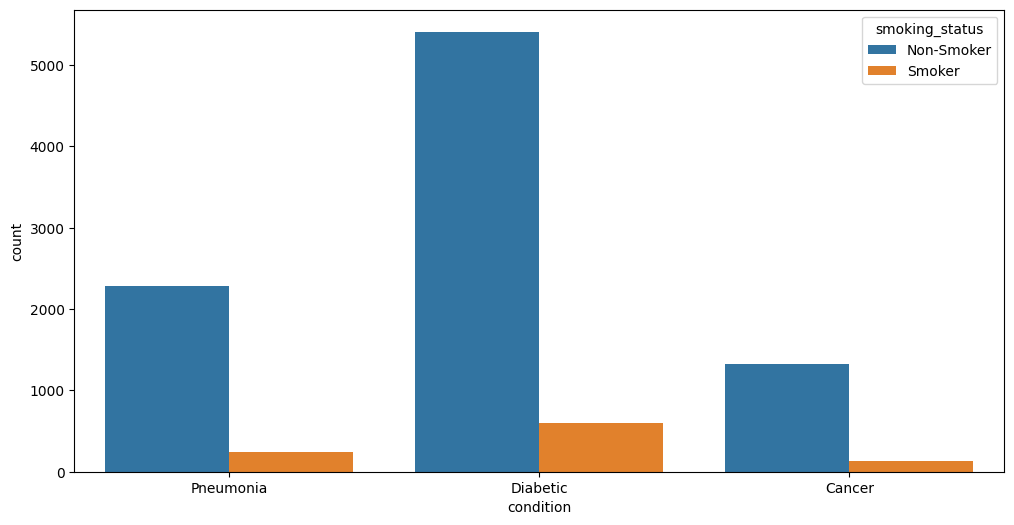

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x="condition", data=df, hue="smoking_status")
plt.show()

## we noticed that the count of males and NON smokers with pneumonia, Diabetic, cancer are more than Females

In [15]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

df['age'] = knn_imputer.fit_transform(df[['age']])
df['bmi'] = knn_imputer.fit_transform(df[['bmi']])
df['blood_pressure'] = knn_imputer.fit_transform(df[['blood_pressure']])
df['glucose_levels'] = knn_imputer.fit_transform(df[['glucose_levels']])

In [16]:
df.head()

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,53.541598,male,Non-Smoker,27.423420,135.209429,135.219608,Pneumonia
1,2,User0002,30.000000,male,Non-Smoker,27.423420,105.315064,135.219608,Diabetic
2,3,User0003,18.000000,male,Non-Smoker,35.612486,135.209429,135.219608,Pneumonia
3,4,User0004,53.541598,male,Non-Smoker,27.423420,99.119829,135.219608,Pneumonia
4,5,User0005,76.000000,male,Non-Smoker,27.423420,135.209429,135.219608,Diabetic


In [17]:
df.isnull().sum()

id                0
full_name         0
age               0
gender            0
smoking_status    0
bmi               0
blood_pressure    0
glucose_levels    0
condition         0
dtype: int64

In [18]:
df_agg = df.groupby('condition')[['age', 'blood_pressure','bmi', 'glucose_levels']].agg(["mean", "min", "max"])
df_agg.columns = ["_".join(c) for c in df_agg.columns]

In [19]:
df_agg.style.background_gradient(cmap='Blues')

,age_mean,age_min,age_max,blood_pressure_mean,blood_pressure_min,blood_pressure_max,bmi_mean,bmi_min,bmi_max,glucose_levels_mean,glucose_levels_min,glucose_levels_max
condition,,,,,,,,,,,,
Cancer,52.575654,18.000000,89.000000,135.461638,90.069975,179.999359,27.599140,15.044370,39.908752,134.051394,70.566444,199.636991
Diabetic,53.802785,18.000000,89.000000,135.173042,90.009620,179.949095,27.372296,15.012119,39.998687,135.487340,70.023115,199.890429
Pneumonia,53.478187,18.000000,89.000000,135.150295,90.118260,179.963748,27.443546,15.030443,39.969824,135.257488,70.015961,199.861741
